# Projects exercices

> Create a program that builds an oracle for a given string (e.g. given 01101, will return a QuantumCircuit that inverts the phase of the state |01101> and leaves all other states unchanged.

Valid bits given...


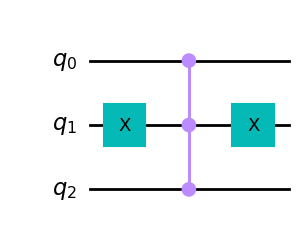

<IPython.core.display.Latex object>

In [81]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCMT

from qiskit import Aer
from qiskit.visualization import array_to_latex

# test the validity of the bits
def test_validity(bits):
    for bit in bits:
        if bit != '0' and bit != '1':
            return False
        
    return True

# display the unitary matrix, for debugging purposes
def display_unitary(qc, prefix=""):
    """Simulate the circuit and display the unitary matrix.

    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix.
        prefix (str): Optional LaTeX prefix for the matrix.
    Returns:
        None (displays matrix as side effect)
    """
    
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect.
    qc = qc.decompose().copy()
    # Tell the simulator to save the unitary matrix
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))
    
# inverse the '0' bit
def inverse_zero(qc, bits):
        # loop through the bits
        for i in range(len(bits)):
            # then inverse the '0' bit
            if bits[i] == '0':
                qc.x(i)

###
# Main function
###
def createOracle(bits, debug=False):
    """Create an oracle for some bits given

    Args:
        bits (string): Bits to create the oracle for
        debug (bool, optional): Debug functions. Defaults to False.
    Returns:
        qc (QuantumCircuit): The circuit for the oracle
    """
    
    # Check if bits are valid
    if test_validity(bits) == False:
        print("Invalid bits given")
        return
    else:
        print("Valid bits given...")
        
        # Create the circuit
        qc = QuantumCircuit(len(bits))
        
        # inverse a first time
        inverse_zero(qc, bits)
                
        # change the phase of the circuit
        match len(bits):
            case 1:
                qc.z(0)
            case 2:
                qc.cz(0, 1)
            case _: # same as 2 qbits, but multicontrolled
                qc = qc.compose(MCMT('cz', len(bits)-1, 1))
        
        # back to the 'original' state
        inverse_zero(qc, bits)
        
        # Debug functions
        if debug == True:
            display(qc.draw('mpl'))
            display_unitary(qc)
            
        measure = QuantumCircuit(len(bits))
        measure.barrier()
        measure.measure_all()
            
        return qc

###
# Run the code
###       
oracle = createOracle('101', debug=True)
    